<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](images/2022-12-11-10-07-35.png)

# 02. Neural Network classification with PyTorch


* Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
- Classification and regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/))are the most common types of machine learning problems.

> Goal : the goal of this session, is to work through a couple of different classification problems with PyTorch. 



## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

- This ingredient list of classification neural network components will vary depending on the problem you're working on.

- But it's more than enough to get started.



![](2022-12-24-12-06-42.png)

> The choice of activation function in the hidden layer will control how well the network model learns the training dataset. 

> The choice of activation function in the output layer will define the type of predictions the model can make.


- Sometimes the activation function is called : **transfer function**, **“squashing function.”**, **“nonlinearity”** .


### Activation function for the Hidden layer


- The modern default activation function for hidden layers is the ReLU function.

- All hidden layers typically use the same activation function. 

- It is most unusual to vary the activation function through a network model.

- The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.



There are perhaps three activation functions you may want to consider for use in hidden layers; they are:

- Rectified Linear Activation (ReLU):  It is defined as a function that returns 0 if the input is less than 0, and returns the input if it is greater than 0. This activation function is used in the hidden layers of a neural network, and it helps to introduce non-linearity into the network.

- Logistic (Sigmoid) : Sigmoid activation function for  transform input values into a range of 0 to 1. It is a non-linear function that can be used to classify data as either 0 or 1, which makes it ideal for binary classification tasks. The sigmoid function is often used as the activation function for the output layer of a neural network, as it allows for the output to be interpreted as a probability.


- Hyperbolic Tangent (Tanh): This function takes any real-valued number and squashes it into a range between -1 and 1. It has a mid-point at 0, which means that negative values are squashed into the range between -1 and 0, and positive values are squashed into the range between 0 and 1.

- there are more.. 

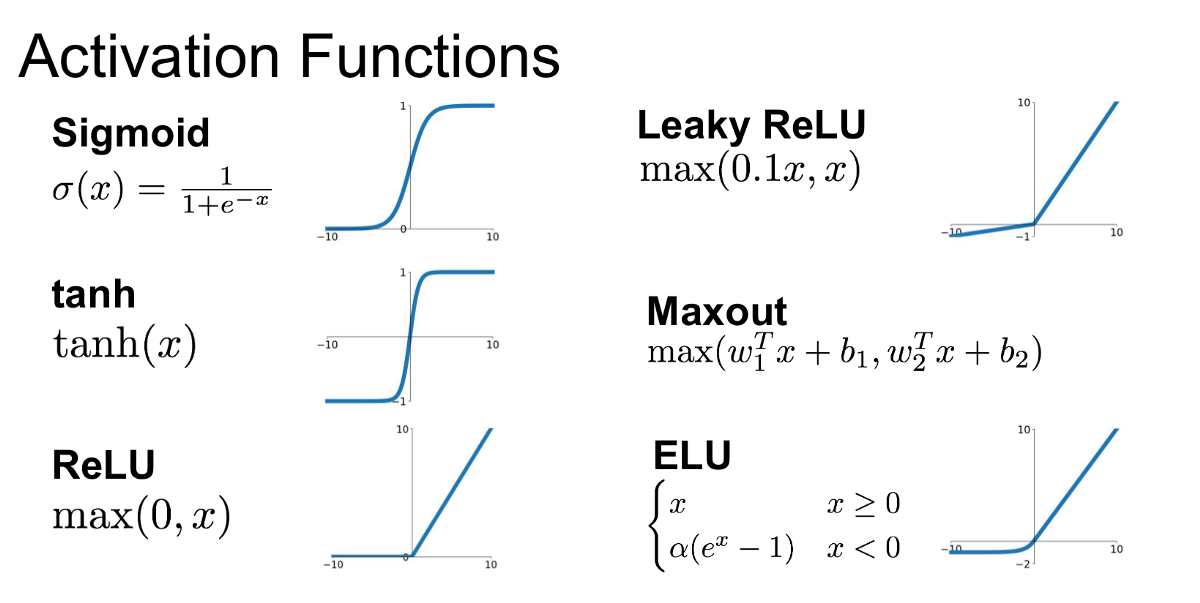

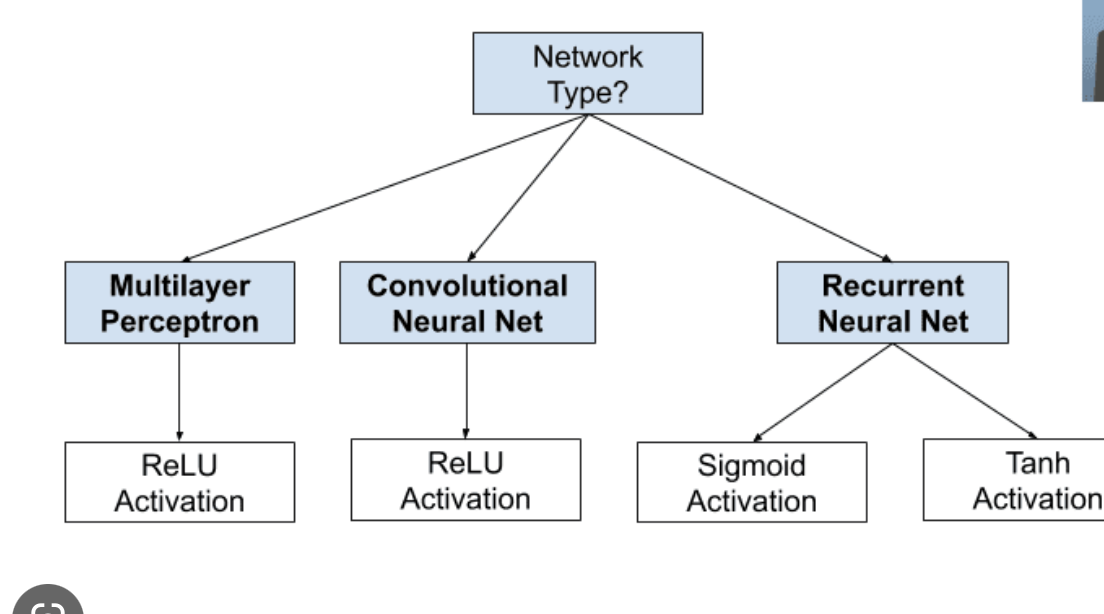

# Explain activation function



 

More here : https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

### Activation function for the output layer

> The activation function for output layers depends on the type of prediction problem


The output layer is the layer in a neural network model that directly outputs a prediction.

- All feed-forward neural network models have an output layer.

- There are perhaps three activation functions you may want to consider for use in the output layer; they are:

- Linear : A linear activation function is a type of activation function that produces an output that is proportional to the input. It is used in artificial neural networks and is often used as the activation function in the output layer of a network. It is also known as a linear threshold function or a linear unit.

  
- Logistic (Sigmoid): - Sigmoid activation function for  transform input values into a range of 0 to 1. It is a non-linear function that can be used to classify data as either 0 or 1, which makes it ideal for binary classification tasks. The sigmoid function is often used as the activation function for the output layer of a neural network, as it allows for the output to be interpreted as a probability.

- Softmax: The softmax activation function is a type of activation function used in neural networks to map the output of a network to a probability distribution over a discrete set of classes and is used in multiclass classification problems. The softmax activation function takes a vector of real numbers as input and outputs a vector of non-negative numbers that sum to 1, representing a probability distribution.


This is not an exhaustive list of activation functions used for output layers, but they are the most commonly used.

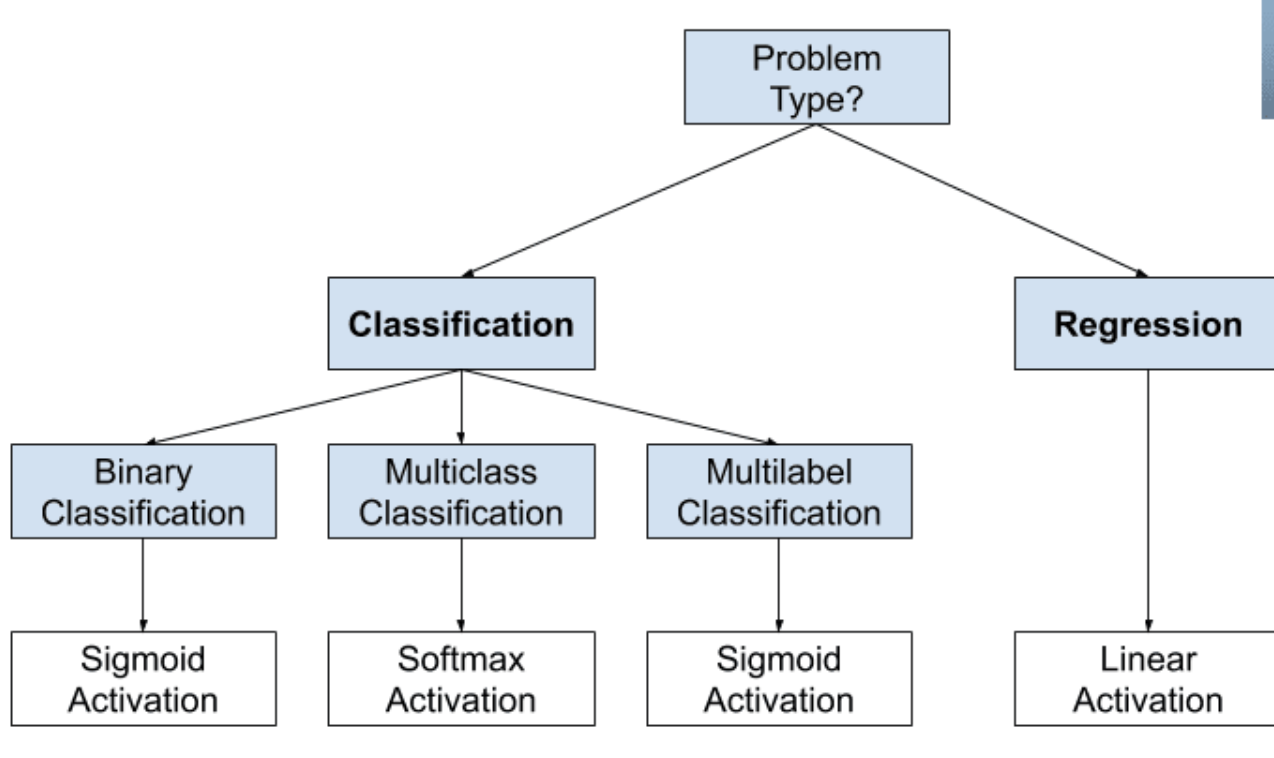

Finally loss function and optimizer

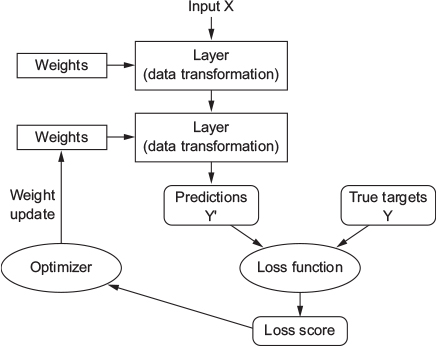

### Optimizer

In deep learning, an optimizer is used to update the parameters of a neural network model in order to minimize a loss function. Common optimizers used in deep learning include stochastic gradient descent (SGD), Adam, RMSprop, and AdaGrad.


> Optimzier: SGD (Stochastic Gradient Descent) is an optimization algorithm used in machine learning to update the weights of the model in order to minimize the cost function. SGD works by calculating the gradient of the cost function with respect to the model weights and then updating the weights in the opposite direction of the gradient.


### Loss Score or Cost function

> Loss function is a measure of how well a given algorithm is performing on a given task. It is typically used to measure the difference between the actual output and the expected output of a model. The loss function is used to optimize the model by minimizing the errors between the predicted and actual output.

- Loss Function: A loss function/error function is for a single training example/input.

- Cost Function: A cost function, on the other hand, is the average loss over the entire training dataset.





> Goal : the goal of this session, is to work through a couple of different classification problems with PyTorch. 


## 1. Make classification data and get it ready

> Toy Dataset: A simple toy dataset to visualize clustering and classification algorithms.



In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
sklearn.datasets.make_circles

<function sklearn.datasets._samples_generator.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)>

In [3]:
help(make_circles)

Help on function make_circles in module sklearn.datasets._samples_generator:

make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)
    Make a large circle containing a smaller circle in 2d.
    
    A simple toy dataset to visualize clustering and classification
    algorithms.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, it is the total number of points generated.
        For odd numbers, the inner circle will have one point more than the
        outer circle.
        If two-element tuple, number of points in outer circle and inner
        circle.
    
        .. versionchanged:: 0.23
           Added two-element tuple.
    
    shuffle : bool, default=True
        Whether to shuffle the samples.
    
    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.
    
    random_sta

In [4]:
make_circles?

Signature:
make_circles(
    n_samples=100,
    *,
    shuffle=True,
    noise=None,
    random_state=None,
    factor=0.8,
)
Docstring:
Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or tuple of shape (2,), dtype=int, default=100
    If int, it is the total number of points generated.
    For odd numbers, the inner circle will have one point more than the
    outer circle.
    If two-element tuple, number of points in outer circle and inner
    circle.

    .. versionchanged:: 0.23
       Added two-element tuple.

shuffle : bool, default=True
    Whether to shuffle the samples.

noise : float, default=None
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset shuffling and noise.
    Pas

In [5]:
dir(sklearn.datasets.make_circles)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [6]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [11]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

> It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

> This tells us that our problem is **binary classification** since there's only two options (0 or 1).


In [12]:
circles.label.value_counts() 

1    500
0    500
Name: label, dtype: int64

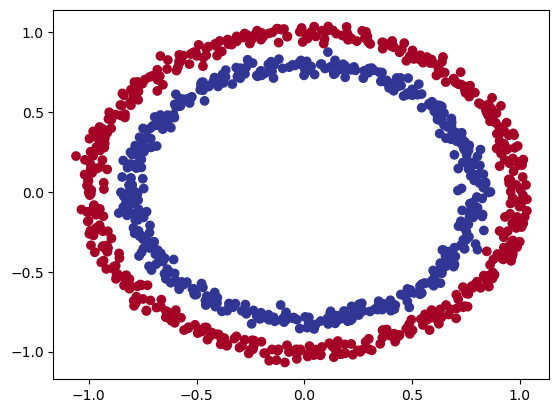

In [13]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

- Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).


### 1.1 Check input and output shapes

> "What shapes are my inputs and what shapes are my outputs?"


In [14]:
X.shape, y.shape

((1000, 2), (1000,))

In [15]:
X.shape[0]

1000

In [16]:
# number of elements in the vector
import numpy as np

p = [1,2,3,4,5,6,7,8,9,10]
p = np.array(p)
p.shape[0] #is the number of elements

10

In [17]:
# the second part in the tuple is the number of features in the dataset 
import numpy as np
c= np.array([1,2])
c.shape

(2,)

In [18]:
c.shape[0]

2

![](2022-12-23-00-20-50.png)

In [19]:
y.shape

(1000,)

In [20]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [21]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

  
- We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

- Specifically, we'll need to:

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).

2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between `X` and `y` and then evaluate those learned patterns on the test dataset).

In [22]:
import torch

In [23]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

> What is the difference between type(x) and dtype(x)



In [24]:
X.dtype

dtype('float64')

In [25]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [26]:
X.dtype 

torch.float32

In [27]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [28]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42) 

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [30]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [31]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [32]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [33]:
X_train.device

device(type='cpu')

In [34]:
X_train = X_train.to(device)

In [35]:
X_train.device

device(type='cpu')

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [36]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
     # takes in 2 features and upscales to 5 features 
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    # layer 1 of the network
    x = self.layer_1(x)
    # layer 2 of the network
    x = self.layer_2(x)
    return x

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [37]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

- This is known as having 5 **hidden units** or **neurons**.?  This layer turns the input data from having 2 features to 5 features.?

- This allows the model to learn patterns from 5 numbers rather than just 2 numbers, *potentially* leading to better outputs.

- The number of hidden units you can use in neural network layers is a **hyperparameter** (a value you can set yourself) and there's no set in stone value you have to use.

- Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with. 

- Since our dataset is small and simple, we'll keep it small.

- The only rule with hidden units is that the next layer, in our case, `self.layer_2` has to take the same `in_features` as the previous layer `out_features`.

- That's why `self.layer_2` has `in_features=5`, it takes the `out_features=5` from `self.layer_1` and performs a linear computation on them, turning them into `out_features=1` (the same shape as `y`)

- ![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)

- A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/)



## nn.sequential

- You can also do the same as above using [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

- `nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear. 

In [38]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

- `nn.Sequential` is fantastic for straight-forward computations, however, as the namespace says, it *always* runs in sequential order.

- So if you'd something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass. E.g., if skip connections



### Yet another : Sequential and a torch.nn.ModuleList?

- What’s the difference between a Sequential and a torch.nn.ModuleList? 

- A ModuleList is exactly what it sounds like–a list for storing Module s! On the other hand, the layers in a Sequential are connected in a cascading way.



In [39]:
# Using Sequential to create a small model. When `model` is run,
# input will first be passed to `Conv2d(1,20,5)`. The output of
# `Conv2d(1,20,5)` will be used as the input to the first
# `ReLU`; the output of the first `ReLU` will become the input
# for `Conv2d(20,64,5)`. Finally, the output of
# `Conv2d(20,64,5)` will be used as input to the second `ReLU`
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

In [40]:
# Using Sequential with OrderedDict. This is functionally the
# same as the above code
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))

> They will give the same output

> OrderedDict is s a dict subclass that preserves the order in which key-value pairs, commonly known as items, are inserted into the dictionary.

- `nn.Sequential` is fantastic for straight-forward computations, however, as the namespace says, it *always* runs in sequential order.

- So if you'd something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass.

- Now we've got a model, let's see what happens when we pass some data through it.

In [41]:
next(model_0.parameters()).device

device(type='cpu')

![](2022-12-23-00-55-19.png)

- Now we've got a model, let's see what happens when we pass some data through it.

In [42]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [43]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0833, -0.1055],
                      [ 0.3578,  0.1464],
                      [-0.3203, -0.6584],
                      [-0.5560,  0.4511],
                      [-0.6767, -0.2047]])),
             ('0.bias', tensor([-0.0633, -0.1884, -0.6412, -0.0140,  0.1026])),
             ('1.weight',
              tensor([[-0.0458, -0.0251, -0.1143, -0.3414, -0.2977]])),
             ('1.bias', tensor([-0.3931]))])

> Pytorch is creating this parameter values for us randomly. You may have different values. 

> When we do backpropagation and gradient descent, the optimzers are going to change the parameters slightly to better fit the data. 

> Deep learning practitioners have taken to calling the prediction phase** inference** but this is a bit of a misnomer—inference refers broadly to any conclusion reached on the basis of evidence, including both the values of the parameters and the likely label for an unseen instance

In [44]:
X_test = X_test.to(device) 

# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])


In [45]:
print(f"\nFirst 10 predictions:\n{(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


First 10 predictions:
tensor([[-0.5051],
        [-0.3476],
        [-0.6245],
        [-0.4725],
        [-0.1586],
        [-0.0660],
        [ 0.0082],
        [ 0.0753],
        [-0.6440],
        [-0.3319]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


- Hmm, it seems there's the same amount of predictions as there is test labels but the predictions don't look like they're in the same form or shape as the test labels.



> How do we make our prediction to be in the same as the test labels?

But, can we round up the predictions?

In [46]:
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")


First 10 predictions:
tensor([[-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-1.],
        [-0.]])


- Ah, it returns all zeros. So, what can we do? 

- The prediction returns are called logits 

- So, what is Logits? 


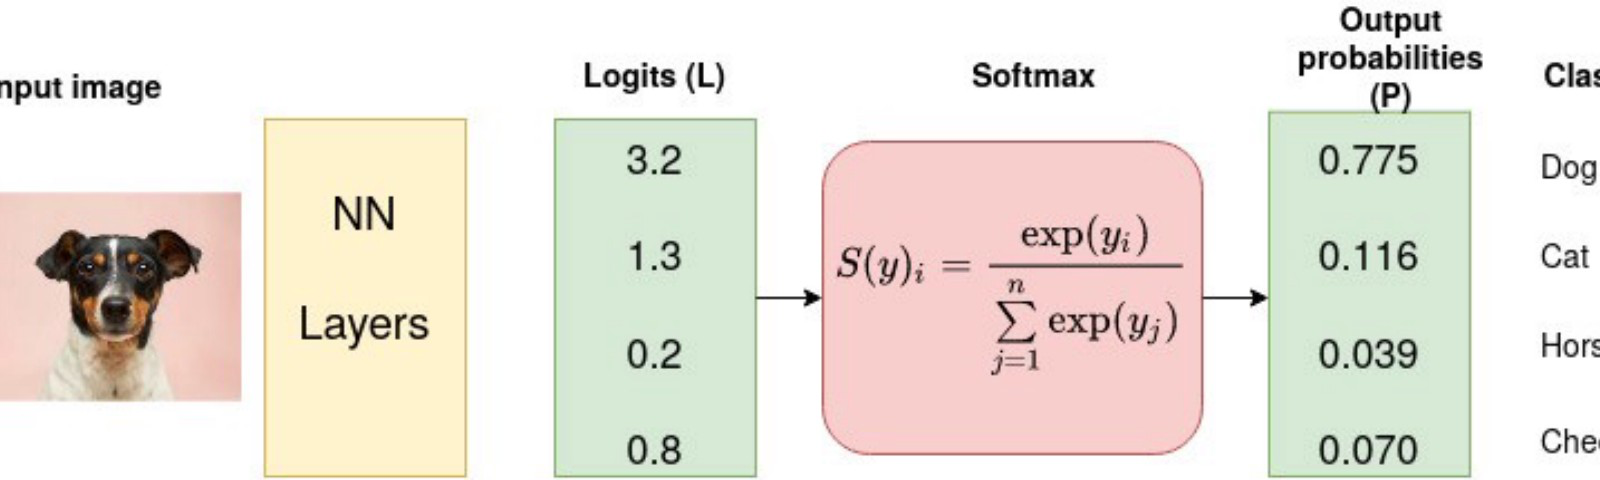

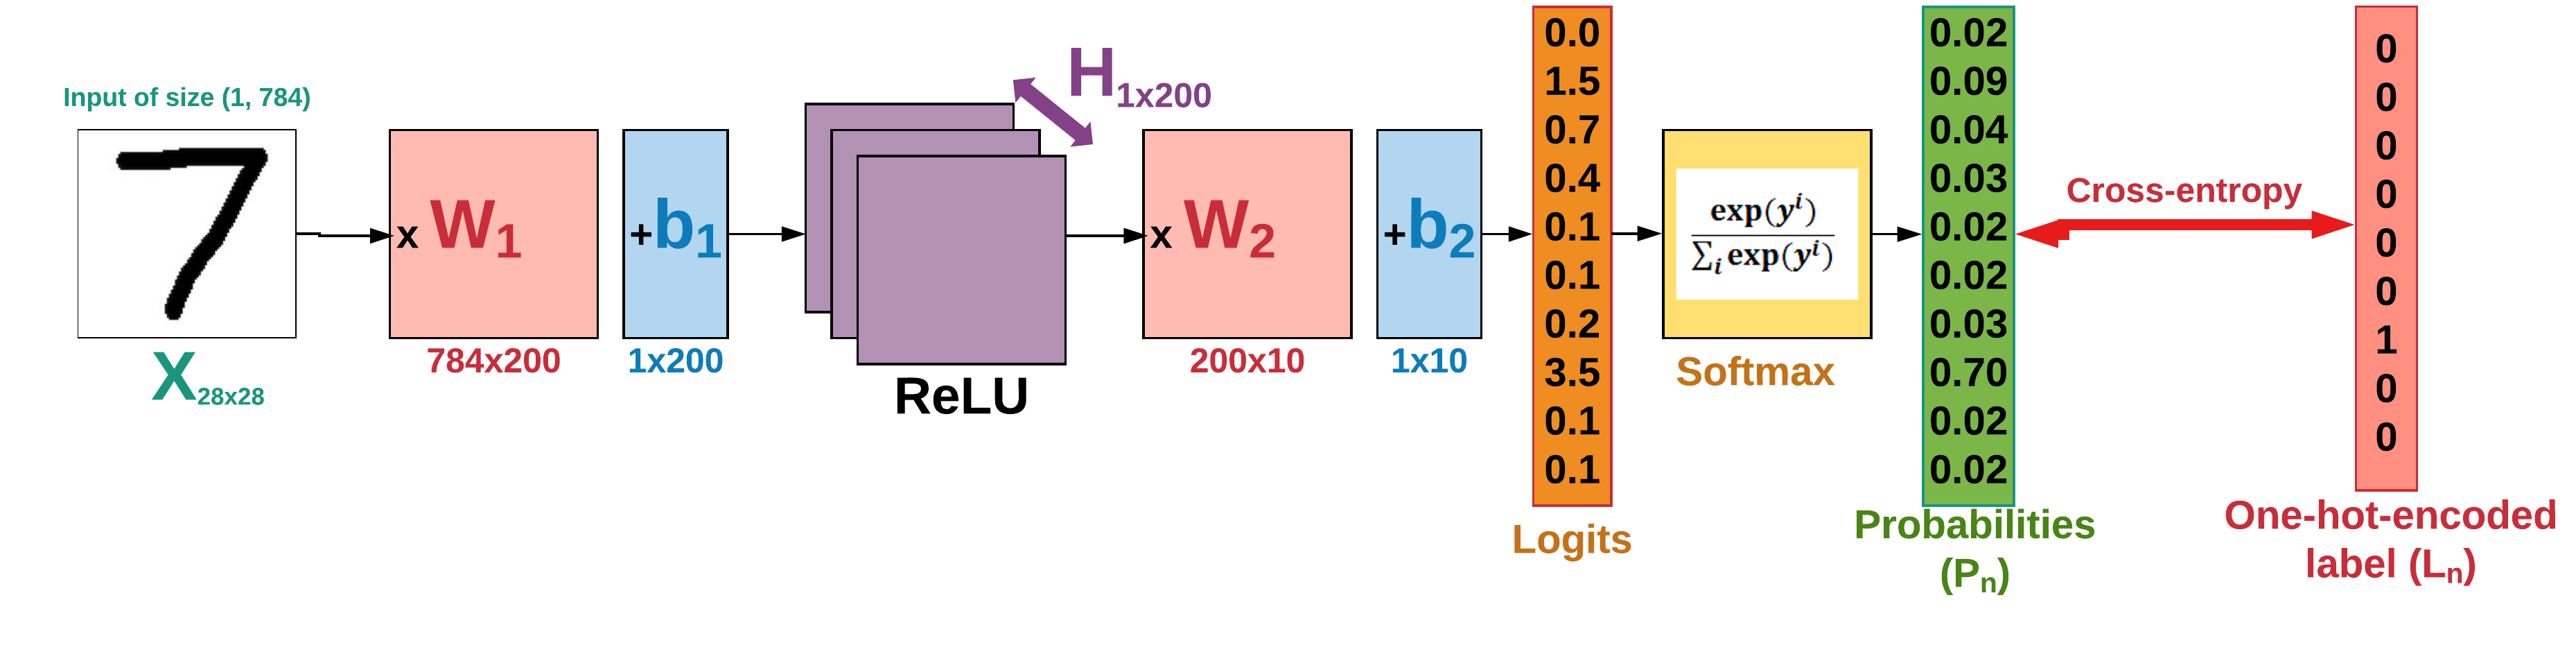

So, what are logits?

> Logits are the outputs of a neural network before the activation function is applied. They represent the raw output of the network and can be used to calculate the probability of each class. Logits are used in supervised learning tasks such as classification, and can be thought of as a measure of confidence for each class.



### 2.1 Setup loss function and optimizer

![](2022-12-24-21-27-37.png)


- Which loss function or optimizer should you use?

- Again... this is problem specific.

- For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

- For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

- As a reminder, the loss function measures how *wrong* your models predictions are.

- And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.


| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these some common ones you'll see.*


Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).



> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

### Example of nn.BCELoss() vs. nn.BCEWithLogitsLoss()

In [47]:
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)

In [48]:
input

tensor([2.6602, 0.1664, 0.0966], requires_grad=True)

In [49]:
target

tensor([1., 0., 1.])

In [50]:

sigmoid = nn.Sigmoid()
probabilities=sigmoid(input)


bce_loss = nn.BCELoss()
output = bce_loss(probabilities, target)


output.backward() 
print(output.item()) #0.4326


0.49781712889671326


In [51]:
bce_logits_loss = nn.BCEWithLogitsLoss()
#with logits
output = bce_logits_loss(input, target)
output.backward()
 
print(output.item()) #0.4326

0.49781718850135803



Which one should you use? 

- The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

- So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.


![](2022-12-24-21-27-37.png)


- Knowing this, let's create a loss function and an optimizer. 

- For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

Loss function

In [52]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

Evaluation metric


- An evaluation metric can be used to offer another perspective on how your model is going.

- If a loss function measures how *wrong* your model is, I like to think of evaluation metrics as measuring how *right* it is.

- Of course, you could argue both of these are doing the same thing but evaluation metrics offer a different perspective.


- There are several evaluation metrics that can be used for classification problems but let's start out with **accuracy**.

- Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.



In [53]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right? 
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_pred)) * 100
  return acc

In [54]:
# create a sample tensor of shape 2,3

true = torch.tensor([1,2,3])
pred = torch.tensor([1,2,4])

torch.eq(true, pred)


tensor([ True,  True, False])

In [55]:
torch.eq(true, pred).sum()
# returns a tensor

tensor(2)

In [56]:
torch.eq(true, pred).sum().item()
# returns a number

2

In [57]:
(torch.eq(true, pred).sum().item())/len(pred) * 100

66.66666666666666

![](2022-12-24-21-27-37.png)


## 3. Train model 

Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent) 

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

- Our model outputs are going to be raw **logits**.

- We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

- Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [58]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval() 
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits 

tensor([[-0.5051],
        [-0.3476],
        [-0.6245],
        [-0.4725],
        [-0.1586]])

In [59]:
# But, true labels are:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [60]:
y_logits # logits

tensor([[-0.5051],
        [-0.3476],
        [-0.6245],
        [-0.4725],
        [-0.1586]])

- These are called Logits. The raw output of our model are logits. 

- Logits are the values before they are passed to an activation function. For example, if we were to use a sigmoid activation function, the logits would be passed to the sigmoid function to get the prediction probabilities. 

- If we were to use a softmax activation function, the logits would be passed to the softmax function to get the prediction probabilities. 
  
- The prediction probabilities can then be converted to prediction labels by rounding or taking the argmax.

In [61]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3763],
        [0.4140],
        [0.3488],
        [0.3840],
        [0.4604]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [62]:
# find predicion labels
y_pred_labels = torch.round(y_pred_probs)
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

The above steps can be done with the following code:

In [63]:
# Logits > pred probs > pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

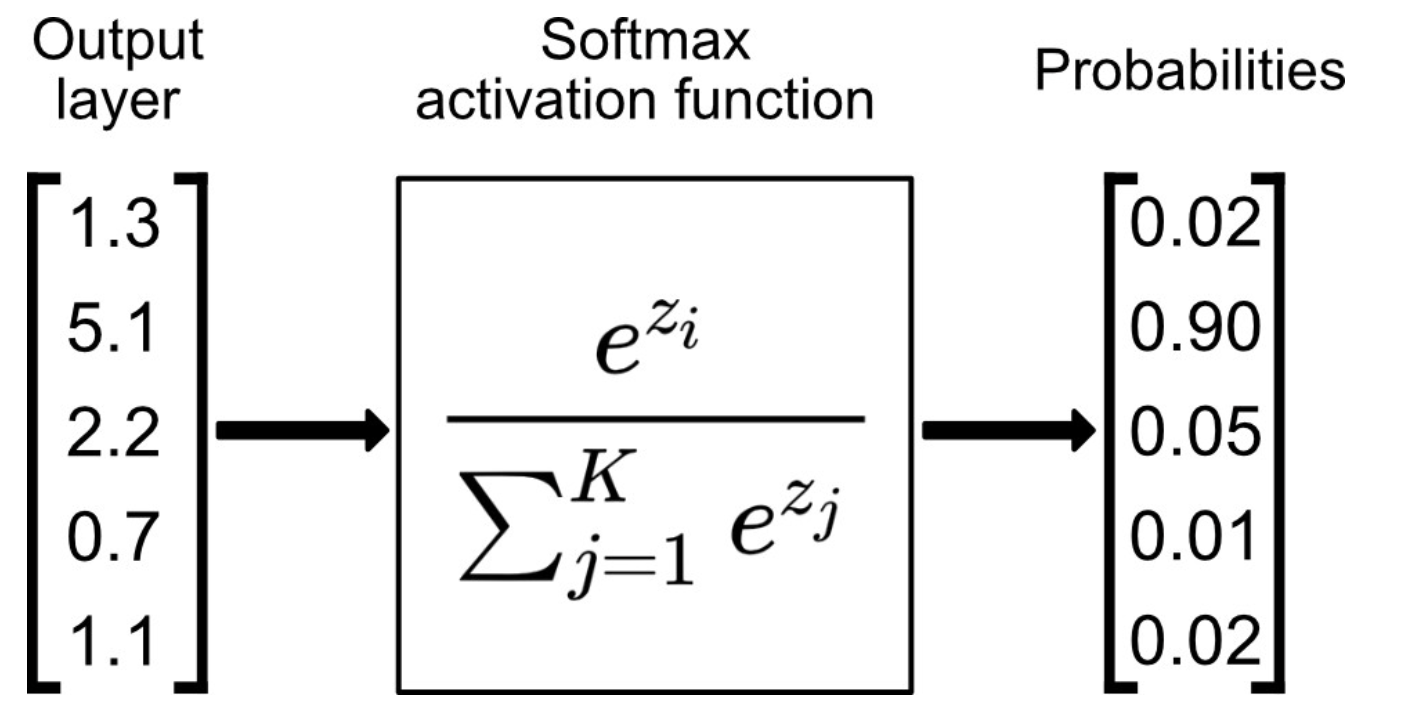

> why are we using Sigmod and not Softmax? 

- Because we're working with a binary classification problem, we'll use a sigmoid activation function to convert our model's logits to prediction probabilities.

- If we were working with a multiclass classification problem, we'd use a softmax activation function.

---
- We'll use `torch.sigmoid()` to convert our model's logits to prediction probabilities.

- We'll use `torch.round()` to convert our model's prediction probabilities to prediction labels.

---
- we will use `torch.softmax()` to convert our model's logits to prediction probabilities. 
  
- We'll use `torch.argmax()` to convert our model's prediction probabilities to prediction labels.
---


> Activation functions play an integral role in neural networks by introducing nonlinearity. This nonlinearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear regression mode


So, now we have all ingredients to build our training loop. Let's do it!

### 3.2 Building a training and testing loop

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# Set the number of epochs
epochs = 100

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()
  
  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # squeeze() removes extra dimension, compare y_logits.shape to y_test.shape
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, 
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step() 

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass 
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71514, Acc: 41.62% | Test loss: 0.71827, Test acc: 41.50%
Epoch: 10 | Loss: 0.70566, Acc: 48.25% | Test loss: 0.70970, Test acc: 43.50%
Epoch: 20 | Loss: 0.70099, Acc: 48.75% | Test loss: 0.70540, Test acc: 46.50%
Epoch: 30 | Loss: 0.69849, Acc: 48.12% | Test loss: 0.70297, Test acc: 49.50%
Epoch: 40 | Loss: 0.69702, Acc: 48.88% | Test loss: 0.70142, Test acc: 51.00%
Epoch: 50 | Loss: 0.69607, Acc: 48.75% | Test loss: 0.70031, Test acc: 49.50%
Epoch: 60 | Loss: 0.69541, Acc: 49.62% | Test loss: 0.69945, Test acc: 50.00%
Epoch: 70 | Loss: 0.69492, Acc: 49.62% | Test loss: 0.69876, Test acc: 50.00%
Epoch: 80 | Loss: 0.69455, Acc: 49.62% | Test loss: 0.69818, Test acc: 49.50%
Epoch: 90 | Loss: 0.69426, Acc: 49.75% | Test loss: 0.69769, Test acc: 49.50%


## 4. Make predictions and evaluate the model

- From the metrics it looks like our model isn't learning anything... 

- So to inspect it let's make some predictions and make them visual! 

- To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [65]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


/Users/shmuhammad/mambaforge/envs/datascience/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/shmuhammad/mambaforge/envs/datascience/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <B1472512-3B02-3383-BB96-3951E48E61DA> /Users/shmuhammad/mambaforge/envs/datascience/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <2653C6C5-E2E5-34B9-8A0E-12388E1D5961> /Users/shmuhammad/mambaforge/envs/datascience/lib/python3.9/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


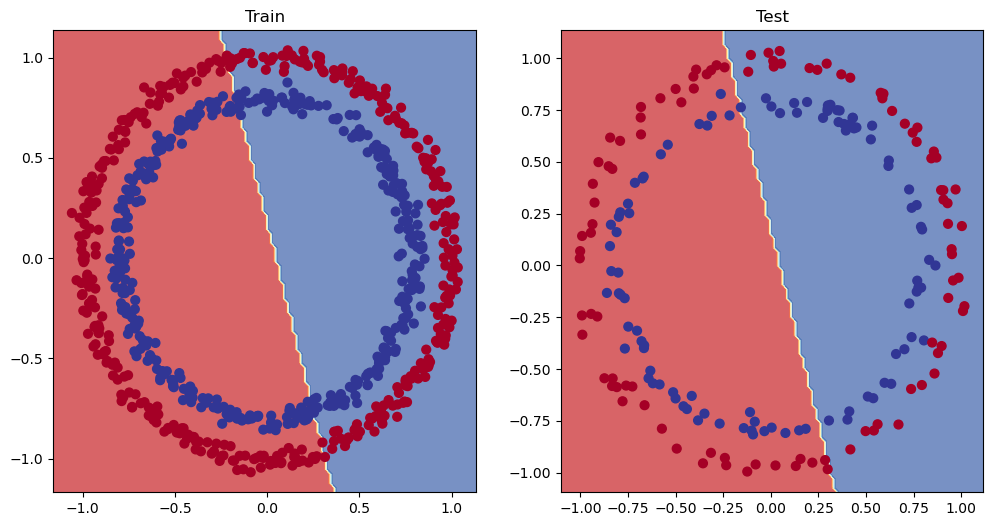

In [66]:
import matplotlib.pyplot as plt
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

> We change one hyperparameter at a time to see how it affects the model's performance.

## 5. Improving a model (from a model perspective)

We can improve the model from two different approaches:

1. From a model perspective (get a better model, adjust the current model)

2. From a data perspective (get more data, make data better)

Here we will try to improve the model from model perspective:
   

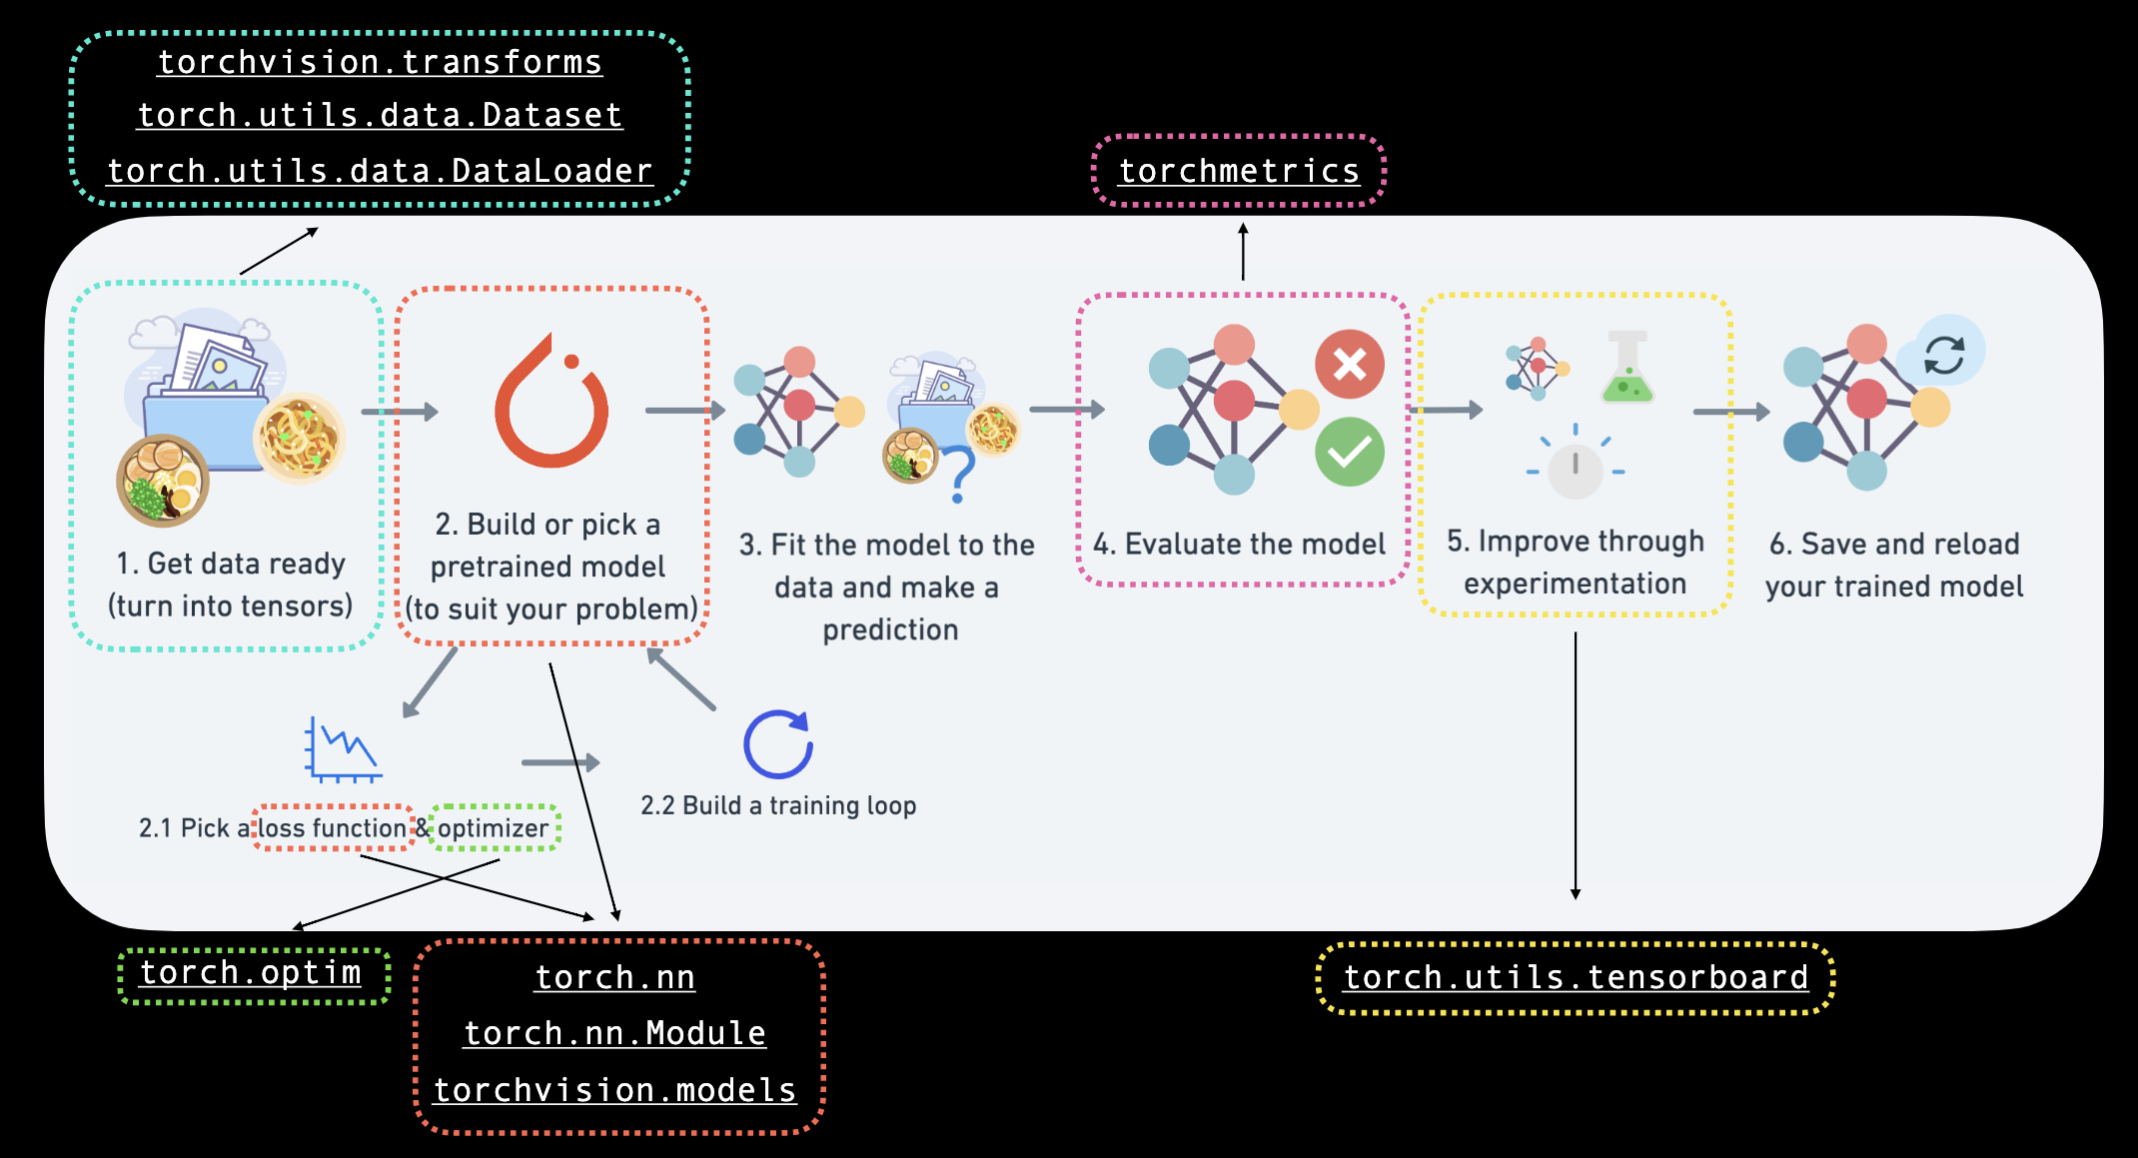


Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**. 
>
> And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

We'll follow the same steps we did above but with a few changed hyperparameters.





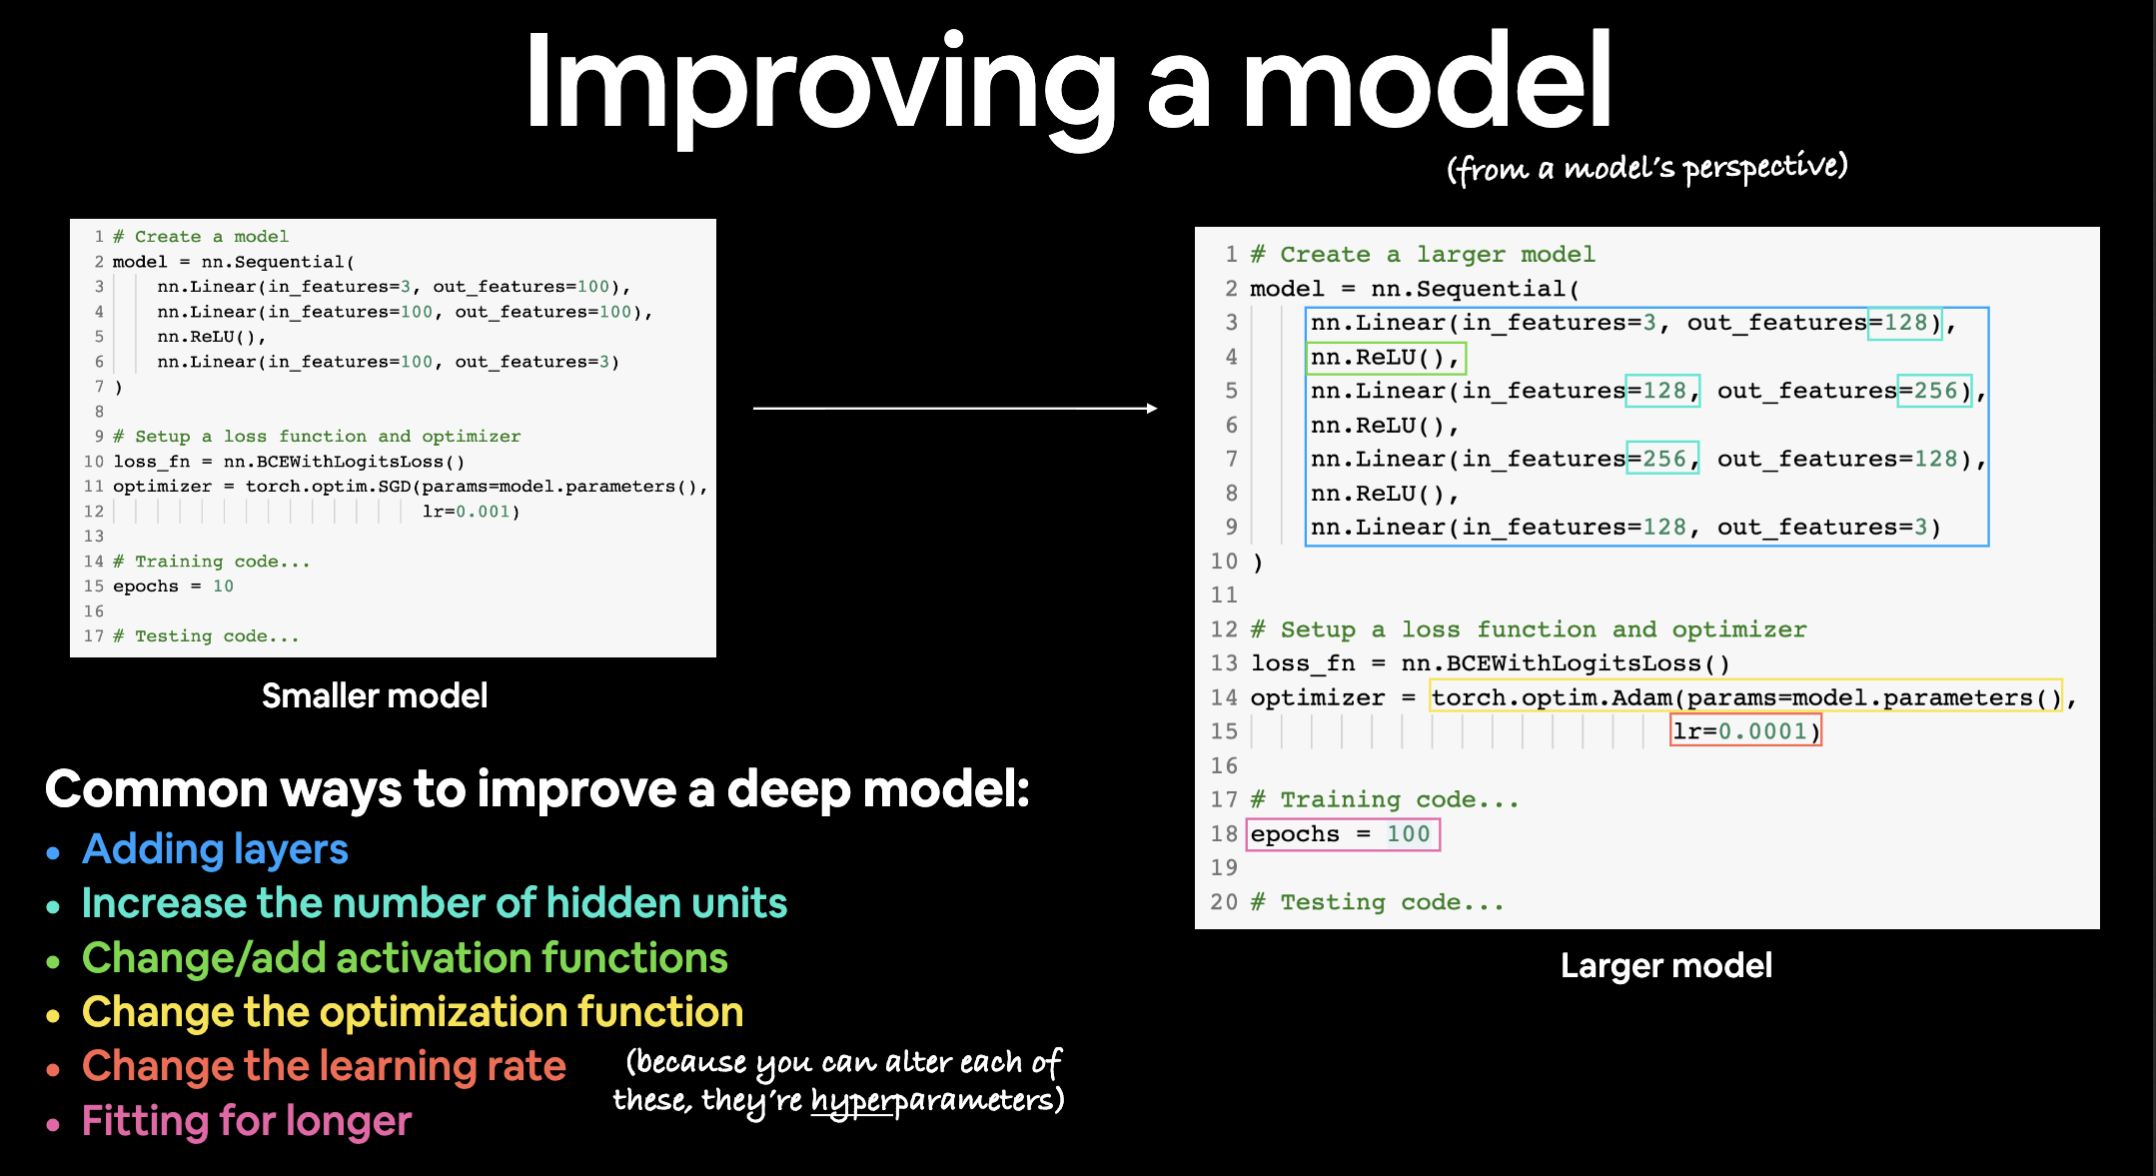





In [67]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [68]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
    #     #Creating a model like this is the same as below, though below
    #     #generally benefits from speedups where possible.
    #     z = self.layer_1(x)
    #     z = self.layer_2(z)
    #     z = self.layer_3(z)
    #     return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Next create a loss function and optimzer

In [69]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), 
                            lr=0.1)

In [70]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad() 

  # 4. Loss backward (backpropagation) 
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) 
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


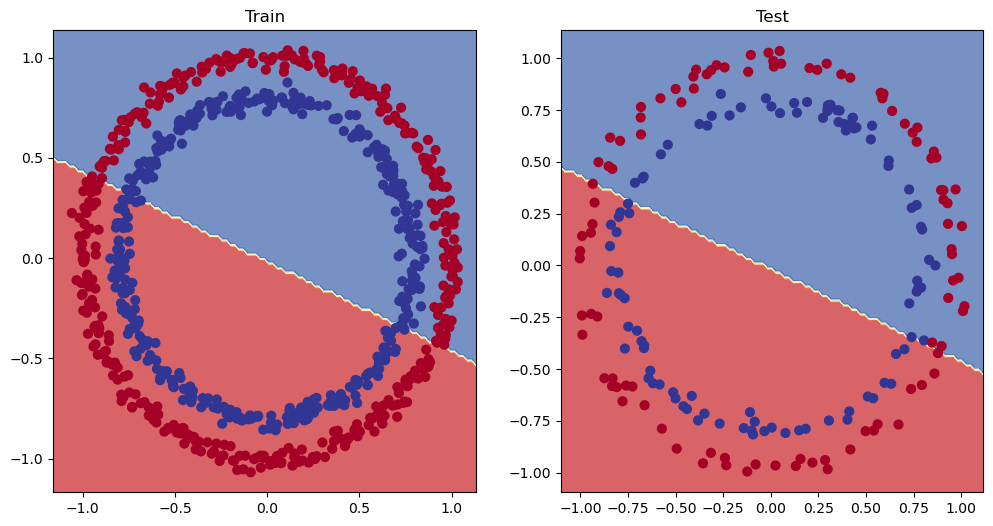

In [71]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

> Still our model is not learning anything.So, what can we do?

### 5.1 Preparing data to see if our model can fit a straight line

- One way to troubleshoot to a larger problem is to test out a smaller problem.

- Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [72]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [73]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

- let's see how the data looks using the `plot_predictions()` function we created in notebook 01. 

- It's contained within the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) we downloaded above.

In [74]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

So, can our model fit the data above?

### 5.2 Adjusting `model_1` to fit a straight line

- Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [75]:
X_regression[:5], X_regression.shape

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 torch.Size([100, 1]))

In [76]:
X_regression[:5], y_regression.shape

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 torch.Size([100, 1]))

> how many inputs does our model need to take?

In [77]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [78]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)

In [79]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


> update learning rate and see performance improvement 

- So, does that means our model is learning something?

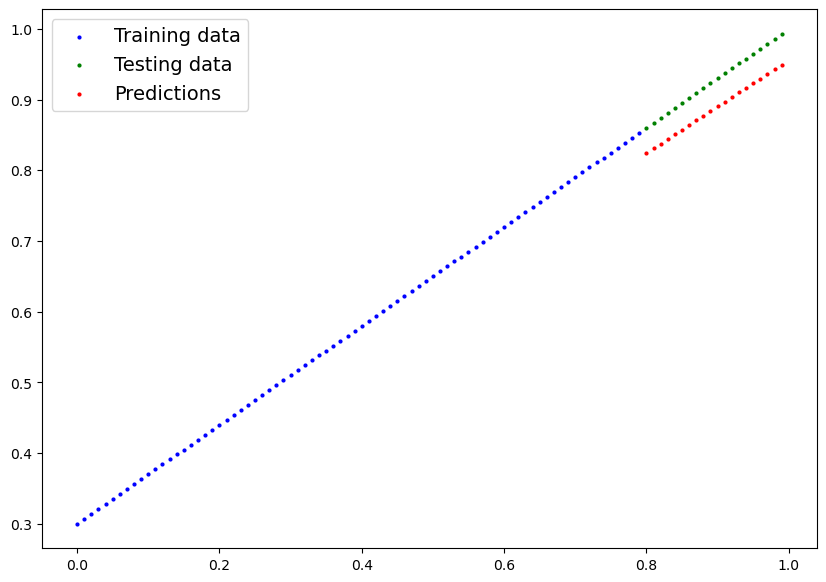

In [80]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(), 
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu()); 

- It seems our model is good at learning a straight line, but not so good at learning a non-linear pattern.

- Let's try and improve our model by adding a non-linear activation function to our model.

## 6. The missing piece: non-linearity 

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

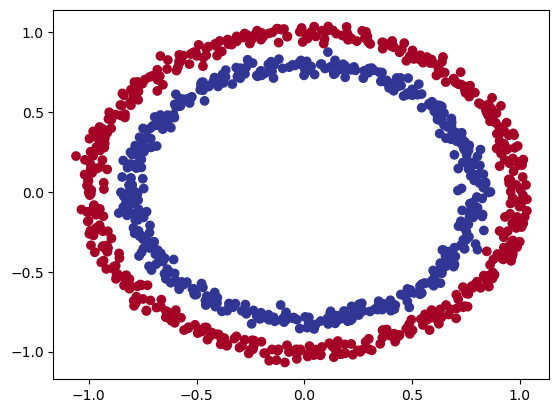

In [81]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [82]:
# Convert data to tensors and then to train and test splits 
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42) 

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

- We've seen our model can draw straight (linear) lines, thanks to its linear layers.

- But how about we give it the capacity to draw non-straight (non-linear) lines?

How?


* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

See : https://pytorch.org/docs/stable/nn.html

In [83]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function
    
  def forward(self, x):
        # Where should we put our non-linear activation functions?
    # Layer 1
    x = self.layer_1(x)
    x = self.relu(x)
    # Layer 2
    x = self.layer_2(x)
    x = self.relu(x)
    # Layer 3
    x = self.layer_3(x)
    
    return x

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

> If we are to use nn.sequential, we need to pass in the layers in the correct order as shown below




![](2022-12-25-13-02-49.png)

In [84]:
model_3 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3 

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [85]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), 
                            lr=0.1)

![a classification neural network on TensorFlow playground with ReLU activation](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*A visual example of what a similar classificiation neural network to the one we've just built (suing ReLU activation) looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

> **Question:** *Where should I put the non-linear activation functions when constructing a neural network?*
>
> A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantine, best to experiment, experiment, experiment.

Now we've got a model ready to go, let's create a binary classification loss function as well as an optimizer.

### 6.3 Training a model with non-linearity

In [86]:
len(X_test), len(y_test)

(200, 200)

In [87]:
# Random seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 2000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, 
                           y_pred=test_pred)
  
  # Print out what's this happening'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6944, Acc: 50.00% | Test Loss: 0.6936, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6916, Acc: 55.12% | Test Loss: 0.6905, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6907, Acc: 50.88% | Test Loss: 0.6892, Test Acc: 54.00%
Epoch: 300 | Loss: 0.6898, Acc: 51.38% | Test Loss: 0.6877, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6886, Acc: 51.38% | Test Loss: 0.6861, Test Acc: 56.00%
Epoch: 500 | Loss: 0.6873, Acc: 52.00% | Test Loss: 0.6844, Test Acc: 56.00%
Epoch: 600 | Loss: 0.6858, Acc: 54.75% | Test Loss: 0.6825, Test Acc: 57.50%
Epoch: 700 | Loss: 0.6837, Acc: 59.75% | Test Loss: 0.6803, Test Acc: 62.00%
Epoch: 800 | Loss: 0.6811, Acc: 56.75% | Test Loss: 0.6777, Test Acc: 58.00%
Epoch: 900 | Loss: 0.6776, Acc: 58.63% | Test Loss: 0.6746, Test Acc: 60.00%
Epoch: 1000 | Loss: 0.6730, Acc: 59.62% | Test Loss: 0.6707, Test Acc: 59.50%
Epoch: 1100 | Loss: 0.6666, Acc: 61.12% | Test Loss: 0.6654, Test Acc: 62.00%
Epoch: 1200 | Loss: 0.6559, Acc: 64.25% | Test Loss: 0.6571, Test Acc: 65.00

> Accuracy increases

### 6.4 Evaluating a model trained with non-linear activation functions

In [88]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

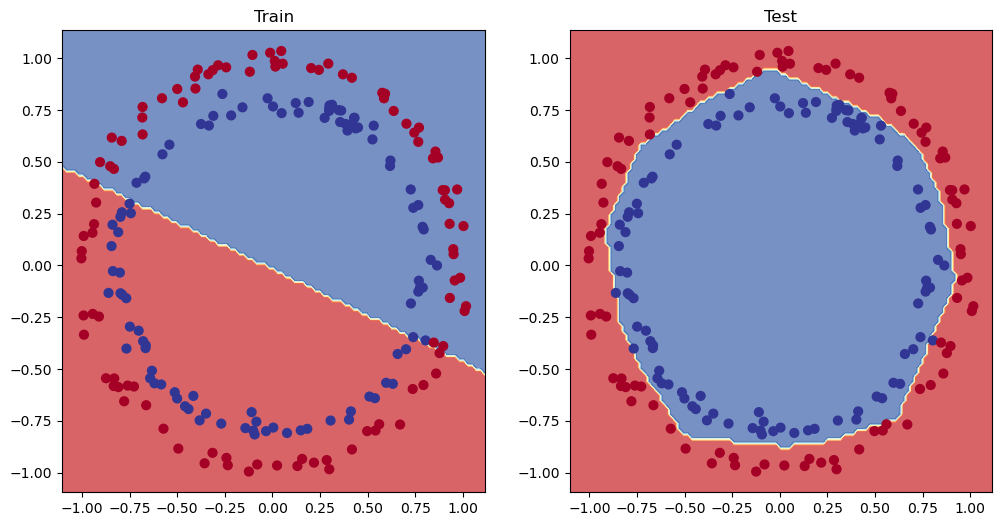

In [89]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_test, y_test) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

- Nice! Not perfect but still far better than before.

- Potentially you could try a few tricks to improve the test accuracy of the model? (hint: head back to section 5 for tips on improving the model)

> **Challenge:** Can you improve model_3 to do better ?

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [90]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [91]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

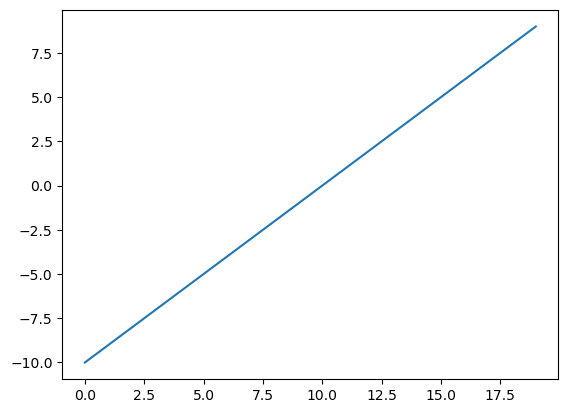

In [92]:
# Visualize the tensor
plt.plot(A); 

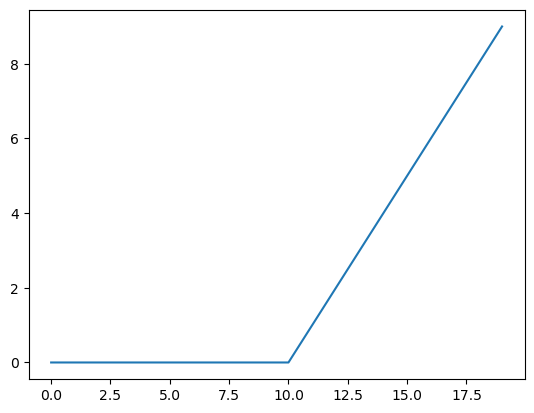

In [93]:
plt.plot(torch.relu(A));

In [94]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [95]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

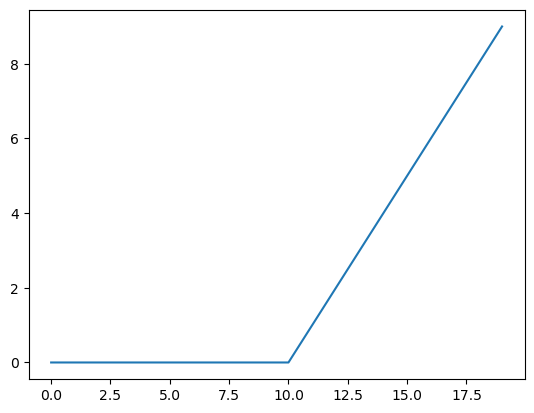

In [96]:
# Plot ReLU activation function
plt.plot(relu(A)); 

In [97]:
# Now let's do the same for Sigmoid = https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid 
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

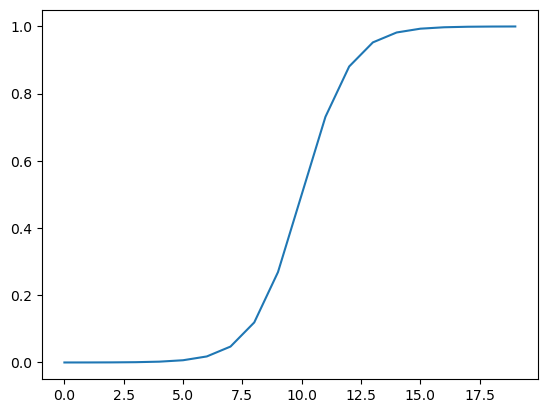

In [98]:
plt.plot(torch.sigmoid(A)); 

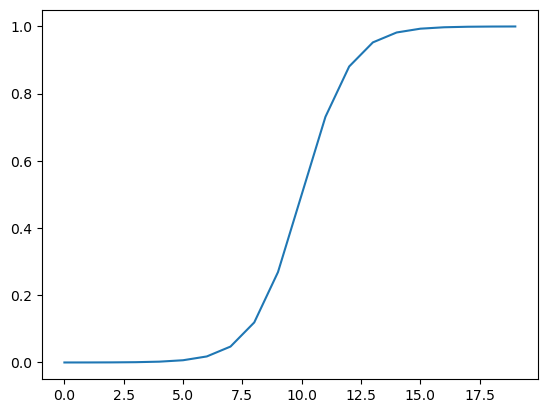

In [99]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

![binary vs multi-class classification image with the example of dog vs cat for binary classification and dog vs cat vs chicken for multi-class classification](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*Example of binary vs. multi-class classification. Binary deals with two classes (one thing or another), where as multi-class classification can deal with any number of classes over two, for example, the popular [ImageNet-1k dataset](https://www.image-net.org/) is used as a computer vision benchmark and has 1000 classes.*

### 8.1 Creating a toy multi-class dataset

Specifically, let's do the following:

1. Create some multi-class data with `make_blobs()`.
2. Turn the data into tensors (the default of `make_blobs()` is to use NumPy arrays).
3. Split the data into training and test sets using `train_test_split()`.
4. Visualize the data.

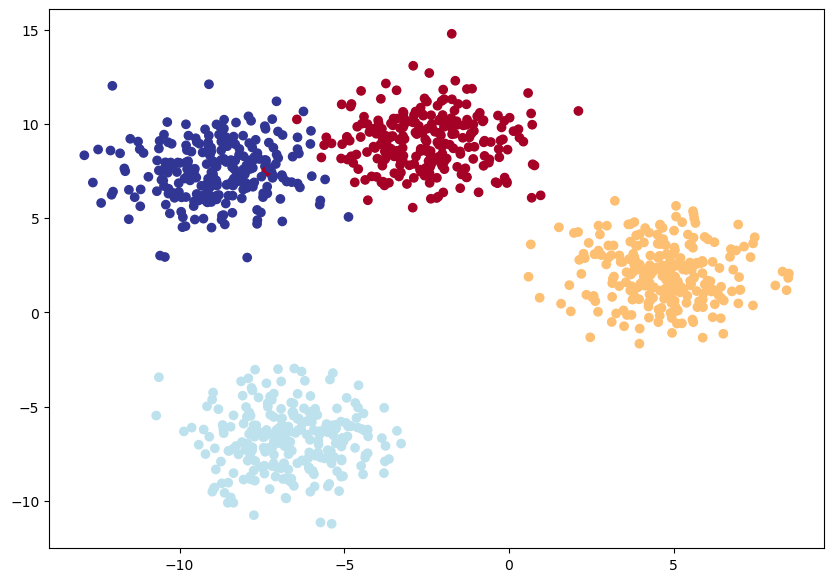

In [100]:
# Import dependencies 
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs 
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2, 
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch


- You might also be starting to get an idea of how flexible neural networks are.

-  How about we build one similar to `model_3` but this still capable of handling multi-class data?

To do so, let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming into the model.
* `output_features` - the ideal numbers of output features we'd like (this will be equivalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem).
* `hidden_units` - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

Then we'll create the model class using the hyperparameters above.

In [101]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [102]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.
    
    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [103]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [104]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

Excellent! Our multi-class model is ready to go, let's create a loss function and optimizer for it.


### 8.3 Create a loss function and an optimizer for a multi-class classification model

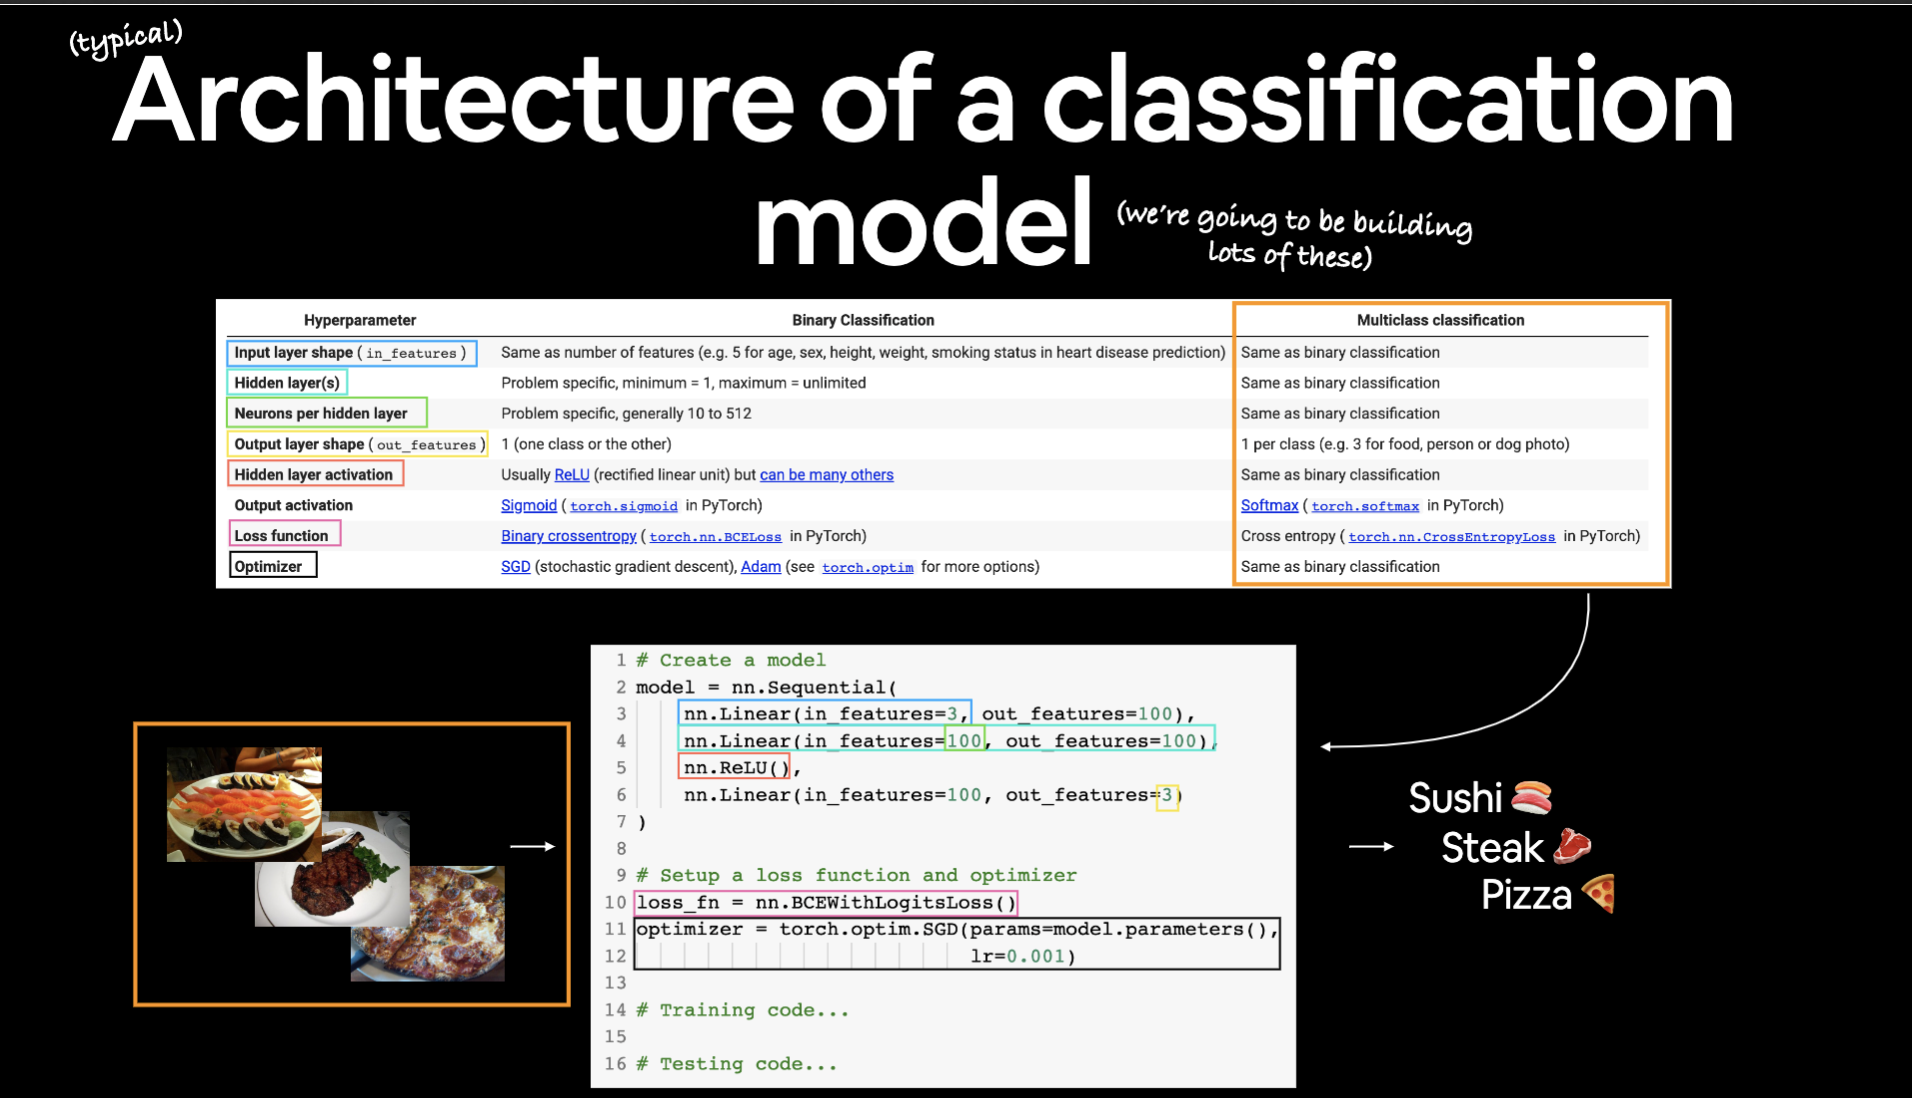

In [105]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(), 
                            lr=0.1) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [106]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [107]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

> We need to convert our logits to probabilities > class labels 

In [108]:
y_logits

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940],
        [ 0.4418, -1.3851,  0.3083,  1.2086],
        [-1.5169, -0.8383, -1.7723, -0.7571],
        [-0.2796, -1.6213, -0.5212,  0.8142],
        [ 0.0087, -1.6676, -0.2100,  1.0779],
        [-0.1146, -1.7781, -0.3619,  1.0633],
        [ 1.4046, -1.2270,  1.3925,  1.8533],
        [ 1.7991, -1.2295,  1.8271,  2.1682],
        [ 1.7553,  0.1992,  1.9850,  1.0572],
        [ 1.7293, -1.4932,  1.7121,  2.3114],
        [ 2.0059, -0.9975,  2.0886,  2.1575],
        [ 1.3878, -1.3971,  1.3495,  1.9682],
        [ 0.2662, -1.2199,  0.1385

In [109]:
torch.softmax?

Docstring: <no docstring>
Type:      builtin_function_or_method


In [110]:
# A dimension along which Softmax will be computed (so every slice along dim will sum to 1).
y_pred_probs = torch.softmax(y_logits, dim=1) # dim=1 means we want to apply softmax to each row
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


>  It may still look like the outputs of the softmax function are jumbled numbers (and they are, since our model hasn't been trained and is predicting using random patterns) but there's a very specific thing different about each sample.

- After passing the logits through the softmax function, each individual sample now adds to 1 (or very close to).

- Let's check.

In [111]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [112]:
torch.max(y_pred_probs[0])

tensor(0.3715)

> How can we get the index of the highest probability or max value?

In [113]:
torch.argmax(y_pred_probs[0])

tensor(3)

In [114]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [115]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

Of course, right now this is just random guessing so it's got a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

> **Note:** To summarize the above, a model's raw output is referred to as **logits**.
> 
> For a multi-class classification problem, to turn the logits into **prediction probabilities**, you use the softmax activation function (`torch.softmax`).
>
> The index of the value with the highest **prediction probability** is the class number the model thinks is *most* likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [116]:
y_blob_train.dtype

torch.int64

In [117]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs 
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training 
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
    
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.5786, Test acc: 95.50%
Epoch: 10 | Loss: 0.1440, Acc: 99.12% | Test loss: 0.1304, Test acc: 99.00%
Epoch: 20 | Loss: 0.0806, Acc: 99.12% | Test loss: 0.0722, Test acc: 99.50%
Epoch: 30 | Loss: 0.0592, Acc: 99.12% | Test loss: 0.0513, Test acc: 99.50%
Epoch: 40 | Loss: 0.0489, Acc: 99.00% | Test loss: 0.0410, Test acc: 99.50%
Epoch: 50 | Loss: 0.0429, Acc: 99.00% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 60 | Loss: 0.0391, Acc: 99.00% | Test loss: 0.0308, Test acc: 99.50%
Epoch: 70 | Loss: 0.0364, Acc: 99.00% | Test loss: 0.0280, Test acc: 99.50%
Epoch: 80 | Loss: 0.0345, Acc: 99.00% | Test loss: 0.0259, Test acc: 99.50%
Epoch: 90 | Loss: 0.0330, Acc: 99.12% | Test loss: 0.0242, Test acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [118]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [119]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]])

In [120]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

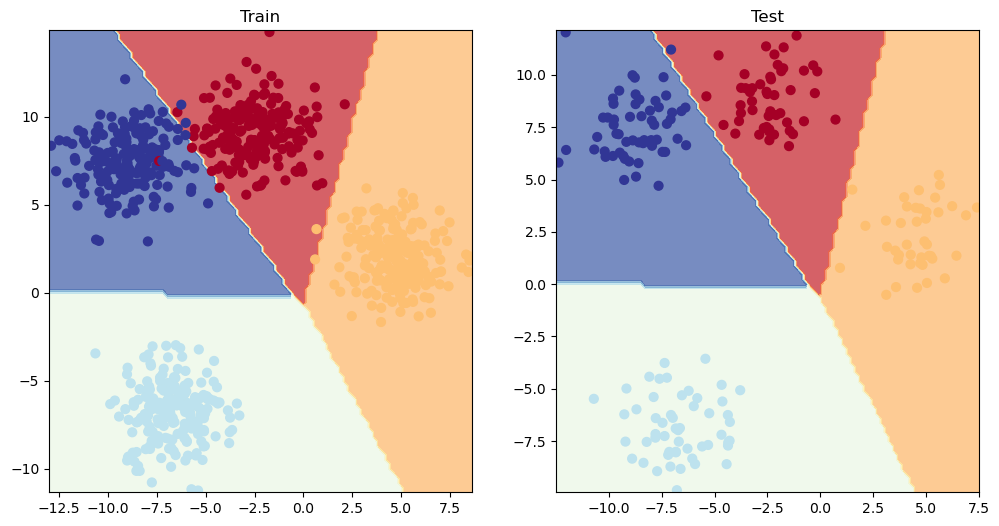

In [121]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

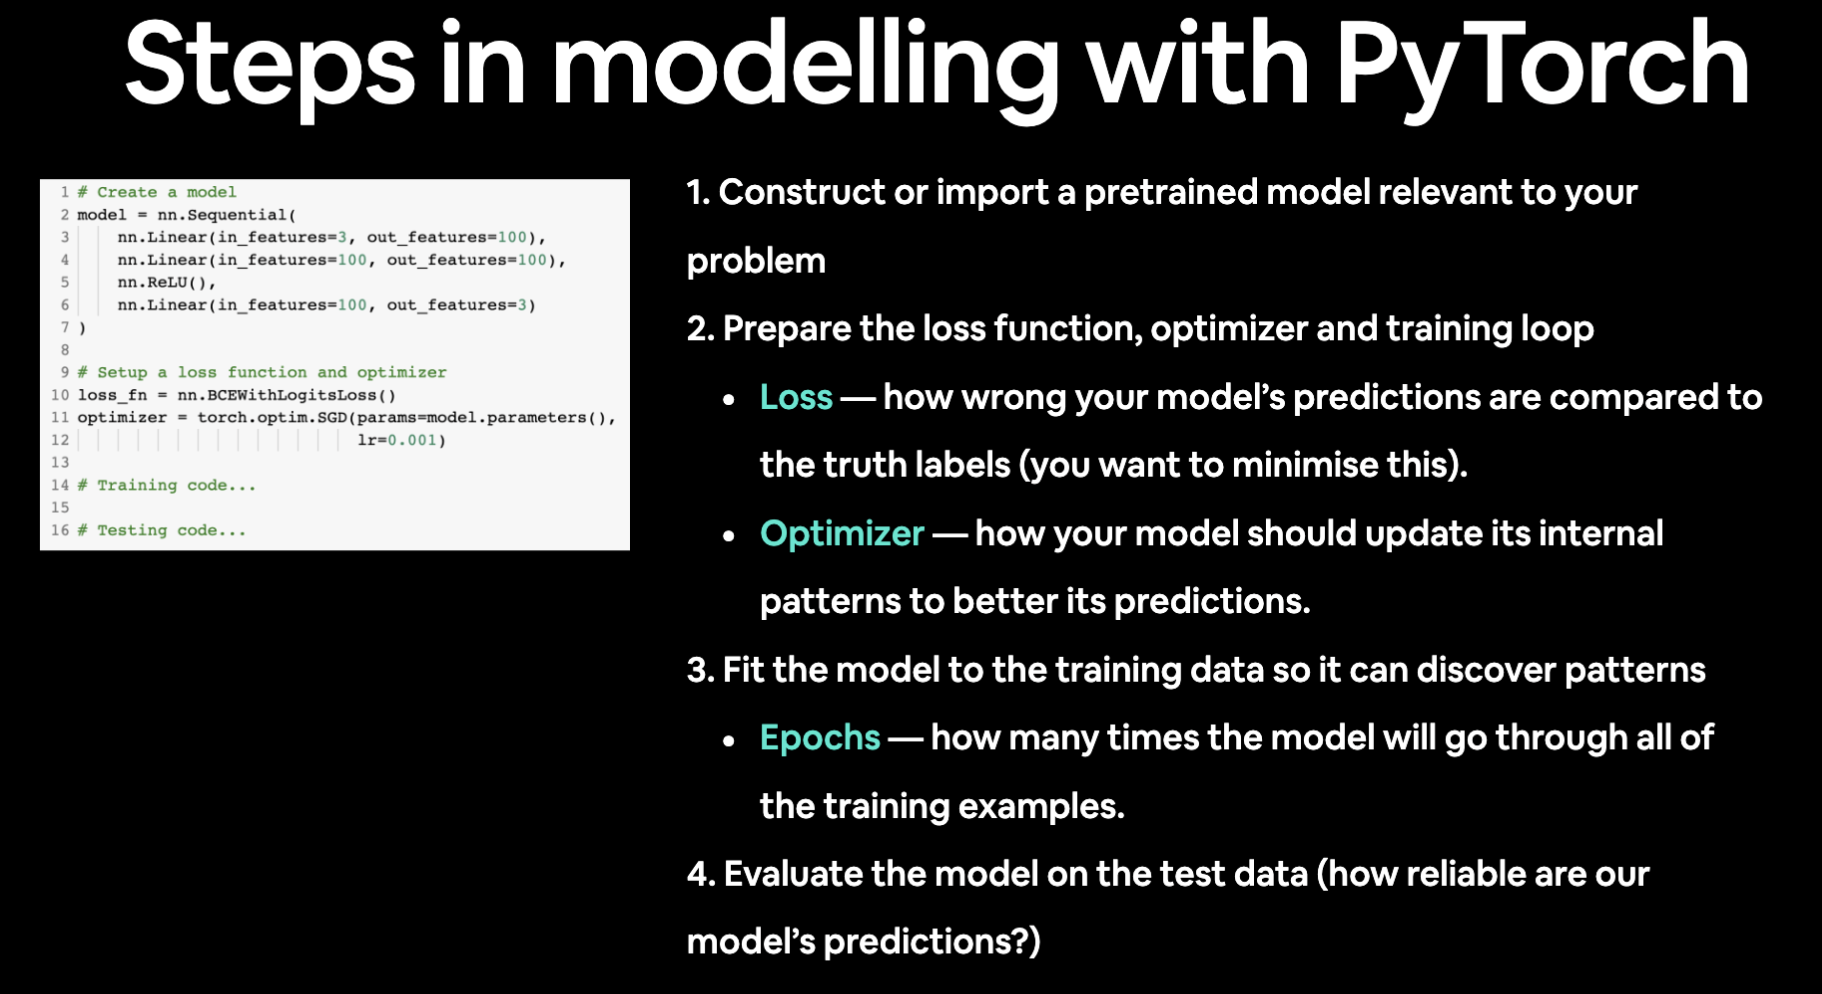

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall 
* F1-score
* Confusion matrix
* Classification report

> TorchMetrics is a collection of 90+ PyTorch metrics implementations and an easy-to-use API to create custom metrics.
> 


- See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/ 




In [122]:
#importlib is a Python standard library module that provides tools for importing and reloading modules
import importlib

try:
    import pandas as p
except ImportError:
    !pip install pandas
    import pandas as pd
    importlib.reload

In [123]:
!pip -q install torchmetrics
importlib.reload

<function importlib.reload(module)>

In [124]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

RuntimeError: Failed to import transformers.modeling_utils because of the following error (look up to see its traceback):
cannot import name 'ReduceOp' from 'torch.distributed' (/Users/shmuhammad/mambaforge/envs/datascience/lib/python3.9/site-packages/torch/distributed/__init__.py)

In [ ]:
torchmetric_accuracy.device

device(type='cpu')

## Exercises & Extra-curriculum 

See exercises and extra-curriculum here: https://www.learnpytorch.io/02_pytorch_classification/#exercises